# TP 8 Distribution Gaussienne
Dans ce TP, nous aimerions explorer le classifieur base sur les distributions gaussiennnes pour une classification binaire.



# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.metrics import f1_score

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
X = np.genfromtxt('X.csv', delimiter=',', dtype=float)
Y = np.genfromtxt('yval.csv', delimiter=',', dtype=float)
X.shape

(307, 2)

Dans ces données (data), les 2 premières colonnes representent les caracteristiques de l'ensemble d'entrainement.

Chaque ligne represente un exemple de notre ensemble de données. 


# Entrainement 
dans cette partie nous allons calculer les parametres de la disribution gaussienne de chaque caracteristique.

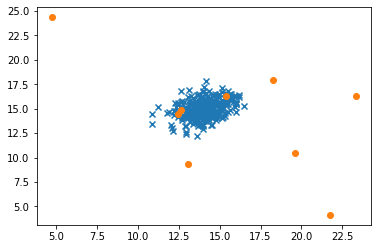

In [3]:
X0 = X[Y==0]
X1 = X[Y==1]
plt.scatter(X0[:,0],X0[:,1], marker ='x')
plt.scatter(X1[:,0],X1[:,1], marker ='o')

Mettons un lien avec ce que nous avons appris en regression linéaire

In [4]:
m = np.mean(X, axis=0)
v = np.var(X, axis=0)

In [5]:
def calculProba(X,m,v):
    return (1 / (np.sqrt(2 * v * np.pi))) * np.exp(- np.power(X - m, 2) / (2 * v))

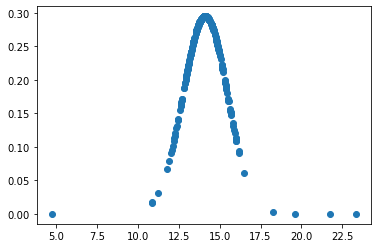

In [6]:
prob = calculProba(X,m,v)
plt.scatter(X[:,0],prob[:,0])

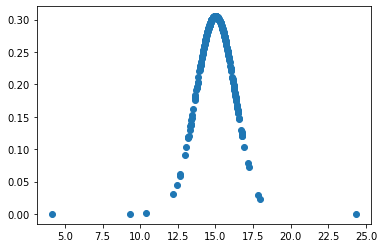

In [7]:
plt.scatter(X[:,1],prob[:,1])

In [14]:
step = 0.00001

f1_scores = []
proba = calculProba(X, m, v)
yproba = proba[:,0]*proba[:,1]
for epsilon in np.arange(step, 1, step):
    y_pred = np.ones(yproba.shape)
    y_pred[yproba >= epsilon] = 0
    VP = np.logical_and(Y,                y_pred).sum()
    VN = np.logical_and(np.logical_not(Y),np.logical_not(y_pred)).sum()
    FP = np.logical_and(np.logical_not(Y),y_pred).sum()
    FN = np.logical_and(Y,                np.logical_not(y_pred)).sum()
    prec = VP/(VP+FP)
    reca = VP/(VP+FN)
    f1_scores.append(2*prec*reca/(prec+reca))
bestScore = np.array(f1_scores).argmax()
bestEpsilon = bestScore * step
print("Le meilleur epsilon est ",bestEpsilon," pour un f1_score de ",f1_scores[bestScore])

Le meilleur epsilon est  6.000000000000001e-05  pour un f1_score de  0.8


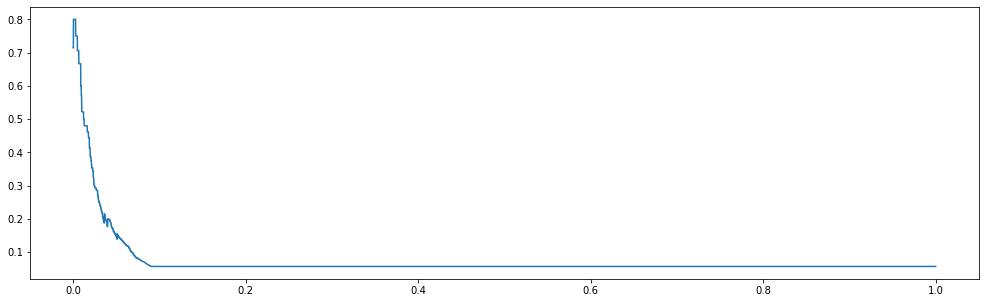

In [21]:
fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.arange(step,1,step),f1_scores)

In [22]:
y_pred = np.ones(yproba.shape)
y_pred[yproba >= bestEpsilon] = 0
#np.logical_and(Y,y_pred).sum()+np.logical_and(np.logical_not(Y),np.logical_not(y_pred)).sum()+np.logical_and(Y,np.logical_not(y_pred)).sum()+np.logical_and(np.logical_not(Y),y_pred).sum()

In [26]:
print("Precision ",(y_pred == Y).sum()/Y.shape[0]*100,"%")

Precision  98.69706840390879 %


# Travail à faire
- 1) Nous aimerions bien choisir le epsilon, ceci est fait en analysant le score F1 obtenu precedenmment
- 2) nous aimerions appliquer une gaussienne multivariée à nos caracterisqtues; et comparer les deux résultats (multiplication des gaussiennes univariées, et gaussienne multivariée)
- 3) Nous aimerions visualiser en 3D la multiplication des gaussiennes univariées et la gaussienne multivariée pour comparaison. 
- 4) **** En Bonus - PAS obligatoire **** : nous aimerions utiliser la loi de Bayes afin de classifier nos exemples. Pour cela, voir le cours.


# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le Lundi 23 Mai 2022 à 22h


In [ ]:
# bonne chance